In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

%cd /content/drive/My Drive/SPCUP/train/normal

/content/drive/My Drive/SPCUP/train/normal


In [ ]:
%ls


'img (101).jpg'  'img (179).jpg'  'img (258).jpg'      'img (333).jpg'
'img (102).jpg'  'img (181).jpg'  'img (259).jpg'      'img (334).jpg'
'img (103).jpg'  'img (182).jpg'  'img (261).jpg'      'img (335).jpg'
'img (104).jpg'  'img (183).jpg'  'img (262).jpg'      'img (336).jpg'
'img (105).jpg'  'img (184).jpg'  'img (263).jpg'      'img (337).jpg'
'img (106).jpg'  'img (185).jpg'  'img (264).jpg'      'img (338).jpg'
'img (107).jpg'  'img (186).jpg'  'img (265).jpg'      'img (339).jpg'
'img (108).jpg'  'img (187).jpg'  'img (266).jpg'      'img (341).jpg'
'img (109).jpg'  'img (188).jpg'  'img (267).jpg'      'img (342).jpg'
'img (111).jpg'  'img (189).jpg'  'img (268).jpg'      'img (343).jpg'
'img (112).jpg'  'img (191).jpg'  'img (269).jpg'      'img (344).jpg'
'img (113).jpg'  'img (192).jpg'  'img (271).jpg'      'img (345).jpg'
'img (114).jpg'  'img (193).jpg'  'img (272).jpg'      'img (346).jpg'
'img (115).jpg'  'img (194).jpg'  'img (273).jpg'      'img (347).jpg'
'img (

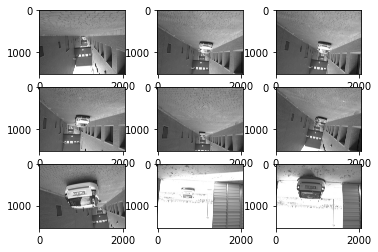

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = 'img'+str(i) +'.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
cv2.imwrite('fig1')

/content/drive/My Drive/SPCUP/train/abnormal


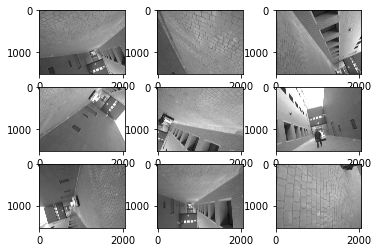

In [ ]:

%cd /content/drive/My Drive/SPCUP/train/abnormal
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = 'img'+str(i) +'.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()



In [ ]:

%cd /content/drive/My Drive/SPCUP/

/content/drive/My Drive/SPCUP


In [ ]:
# baseline 1 blockCNN model 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	pyplot.subplots_adjust(hspace=2)
	pyplot.savefig('filename' + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Found 468 images belonging to 2 classes.
Found 115 images belonging to 2 classes.
Epoch 1/20
8/8 [==============================] - 37s 5s/step - loss: 2.8889 - accuracy: 0.5449 - val_loss: 0.6952 - val_accuracy: 0.6087
Epoch 2/20
8/8 [==============================] - 33s 4s/step - loss: 0.6623 - accuracy: 0.6197 - val_loss: 0.6270 - val_accuracy: 0.6087
Epoch 3/20
8/8 [==============================] - 33s 4s/step - loss: 0.5768 - accuracy: 0.6175 - val_loss: 0.6876 - val_accuracy: 0.4435
Epoch 4/20
8/8 [==============================] - 33s 4s/step - loss: 0.4716 - accuracy: 0.7991 - val_loss: 0.4721 - val_accuracy: 0.7826
Epoch 5/20
8/8 [==============================] - 33s 4s/step - loss: 0.3787 - accuracy: 0.8162 - val_loss: 0.3859 - val_accuracy: 0.9130
Epoch 6/20
8/8 [==============================] - 33s 4s/step - loss: 0.2709 - accuracy: 0.9209 - val_loss: 0.3688 - val_accuracy: 0.8783
Epoch 7/20
8/8 [==============================] - 33s 4s/step - loss: 0.2093 - accuracy: 0

In [ ]:
# baseline 2 block CNN
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
  
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  pyplot.subplots_adjust(hspace=2)
	# save plot to file
 
	pyplot.savefig('_plot1.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

IndentationError: ignored

In [ ]:
# baseline 2 block CNN
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn import class
# define cnn model
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot2.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()